In [3]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import pickle

/home/zhuzhehua/anaconda3/envs/dimo1/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
usr_id_emb_sasrec = pickle.load(open('/home/zhuzhehua/2025/LLM-ESR2/usr_emb/usr_id_emb_sasrec.pkl', 'rb')).cpu().numpy()
usr_llm_emb_sasrec = pickle.load(open('/home/zhuzhehua/2025/LLM-ESR2/usr_emb/usr_llm_emb_sasrec.pkl', 'rb'))

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import matplotlib.cm as cm

def tsne(list_of_features, labels_display=None, perplexity=30, random_state=42):
    """
    将多组特征用t-SNE降维并可视化
    
    参数:
        list_of_features: 包含多个特征数组的列表，每个数组形状为(n_samples, n_features)
        labels_display: 可选，每组特征的显示名称列表
        perplexity: t-SNE的perplexity参数
        random_state: 随机种子
    """
    # 将输入的特征转换为numpy数组并合并
    features_list = [feat if isinstance(feat, np.ndarray) else feat.detach().cpu().numpy() 
                    for feat in list_of_features]
    features = np.concatenate(features_list, axis=0)
    
    # 创建对应的标签
    labels = np.concatenate([np.full(len(feat), i) for i, feat in enumerate(features_list)])
    
    # 执行t-SNE降维 (固定为2维可视化)
    tsne = TSNE(n_components=2, random_state=random_state, perplexity=perplexity)
    features_tsne = tsne.fit_transform(features)
    
    # 自动生成颜色和标签
    n_groups = len(features_list)
    colors = cm.rainbow(np.linspace(0, 1, n_groups))
    if labels_display is None:
        labels_display = [f'Group {i}' for i in range(n_groups)]
    elif len(labels_display) != n_groups:
        raise ValueError("labels_display长度必须与list_of_features相同")
    
    # 可视化
    plt.figure(figsize=(10, 8))
    for i in range(n_groups):
        mask = labels == i
        plt.scatter(features_tsne[mask, 0], features_tsne[mask, 1], 
                   c=[colors[i]], label=labels_display[i], alpha=0.6)
    
    plt.title('t-SNE Visualization of Feature Groups')
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.legend()
    plt.grid(True)
    plt.show()

/home/zhuzhehua/anaconda3/envs/dimo1/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/zhuzhehua/anaconda3/envs/dimo1/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


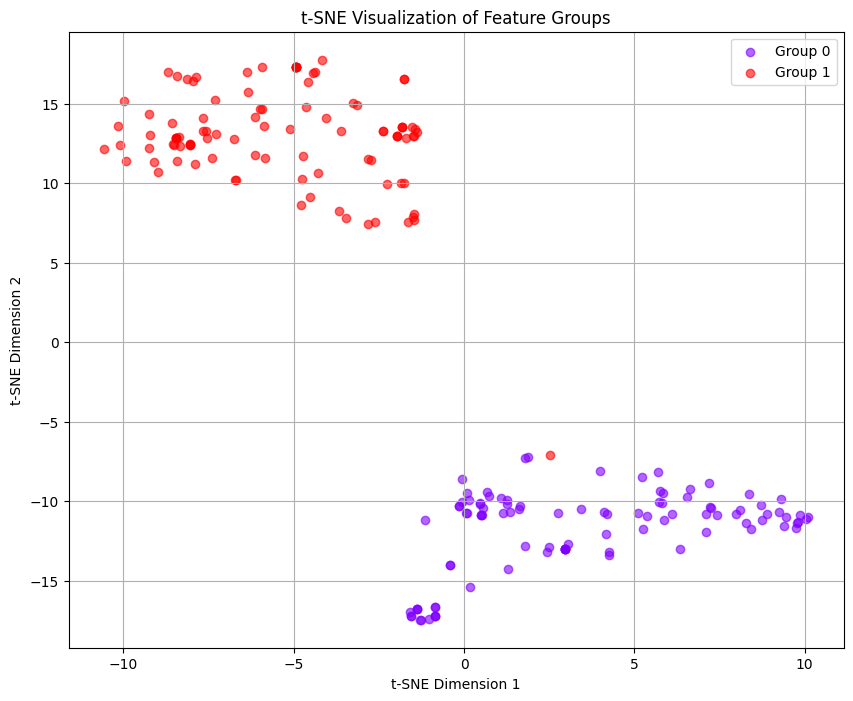

In [13]:
tsne([usr_llm_emb_sasrec[:100,:], usr_id_emb_sasrec[:100,:]])

In [14]:
usr_llm_emb_np = pickle.load(open('/home/zhuzhehua/2025/LLM-ESR2/data/fashion/handled/usr_emb_np.pkl', 'rb'))
usr_id_emb_np = pickle.load(open('/home/zhuzhehua/2025/LLM-ESR2/data/fashion/handled/usr_emb_collab_np.pkl', 'rb'))

In [15]:
from sklearn.decomposition import PCA

pca1 = PCA(n_components=64)
pca_usr_llm_emb_np = pca1.fit_transform(usr_llm_emb_np)
pca2 = PCA(n_components=64)
pca_usr_id_emb_np = pca2.fit_transform(usr_id_emb_np)


In [16]:
pca_usr_id_emb_np.shape

(16005, 64)

/home/zhuzhehua/anaconda3/envs/dimo1/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/zhuzhehua/anaconda3/envs/dimo1/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


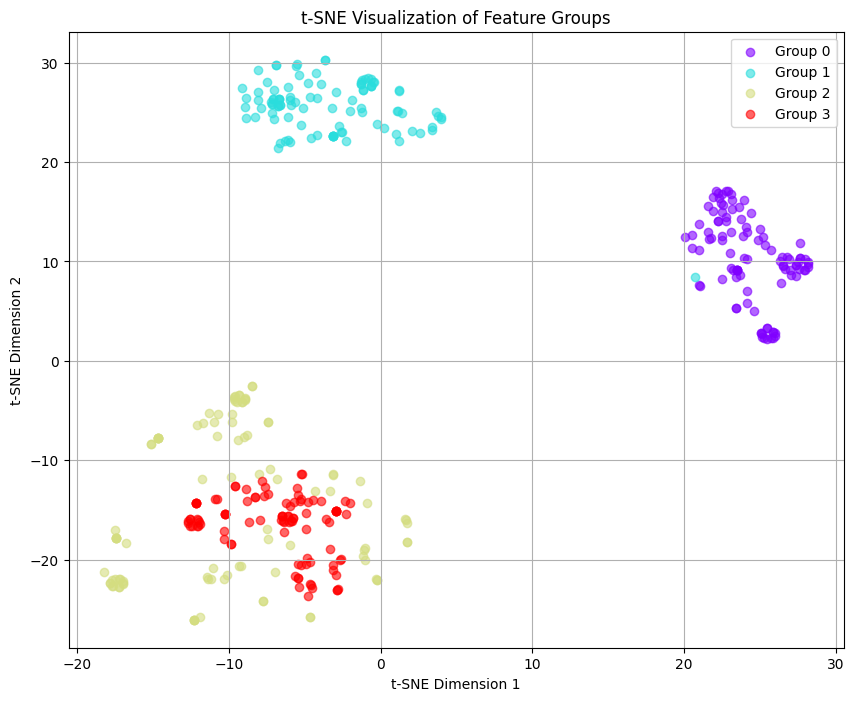

In [17]:
tsne([usr_llm_emb_sasrec[:100,:], usr_id_emb_sasrec[:100,:], pca_usr_llm_emb_np[:100,:], pca_usr_id_emb_np[:100,:]])
# output, output, original, original